In [1]:
from langchain_groq import ChatGroq
from langchain_tavily import TavilySearch
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field
from typing import TypedDict, Annotated
import faiss
from langchain_community.vectorstores import FAISS

## **Prepare vector Store and Sentence embedding**

In [2]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("data/attentation-all-you-need.pdf")
docs = loader.load()
len(docs)

15

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 80
)

documents = splitter.split_documents(documents=docs)
len(documents)

96

In [4]:
documents[5]

Document(metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-10T21:11:43+00:00', 'author': '', 'keywords': '', 'moddate': '2024-04-10T21:11:43+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'data/attentation-all-you-need.pdf', 'total_pages': 15, 'page': 0, 'page_label': '1'}, page_content='detail. Niki designed, implemented, tuned and evaluated countless model variants in our original codebase and\ntensor2tensor. Llion also experimented with novel model variants, was responsible for our initial codebase, and\nefficient inference and visualizations. Lukasz and Aidan spent countless long days designing various parts of and\nimplementing tensor2tensor, replacing our earlier codebase, greatly improving results and massively accelerating\nour research.')

In [5]:
from dotenv import load_dotenv
import os
load_dotenv()
from langchain_groq import ChatGroq

os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

c:\Users\IT BD\anaconda3\envs\ailb\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
len(embeddings.embed_query("hello"))

768

In [7]:
index = faiss.IndexFlatIP(768)

In [8]:
from langchain_community.docstore.in_memory import InMemoryDocstore

In [9]:
vector_store = FAISS(
 embedding_function=embeddings,
 index=index,
 docstore=InMemoryDocstore(),
 index_to_docstore_id={}
)

In [10]:
vector_store.add_documents(documents=documents)

['880c48fc-cf44-4764-8204-7b80ea016cbd',
 'fa2a710c-f40d-4aaa-a252-4fb897650cf6',
 'a95ab0c1-62a6-4d28-8369-01df00445065',
 '8af26964-ad26-4329-9a09-d47318fac05f',
 'dfabf339-b047-42db-81d4-9d343d7b2b48',
 'ca826111-a542-4481-993f-3cdf776a3321',
 'f8336619-8a13-4aa7-af76-d57d847df8ff',
 'dafda30a-33bf-46ae-99b9-21b39221a5aa',
 '6ba8f2b9-e9ed-433a-a25c-9077a8bbf8a2',
 '845a151e-3cb6-4a47-846a-8813a24d9689',
 'f5109338-eb7d-4b20-a9d2-cc0ca2736a4b',
 '62fe1536-18a3-4f58-86df-e4a575c30eca',
 '0a22c338-099e-4c3c-bde9-405d2fd8d2ca',
 '73301dbf-2334-438d-8fe9-418c1e2da4ef',
 '11c4de29-860a-4d94-862d-8f3e2dd964e9',
 'a92d9716-257a-4510-b220-fd95ae682e8f',
 '8e757695-b80c-42c4-a83e-ae9a78fb07a5',
 'fd1cf538-53d1-4016-b00c-9cbe7f095b2e',
 '9750849e-8559-429d-be09-370b2112783f',
 '4ad83f5d-6071-43e5-bc92-56e791e5bcf4',
 '6961ee20-2490-4c2f-a2e0-a403c797918f',
 'a2b597b4-68e7-47c3-975d-233a4f1d4507',
 'c51d434c-66ea-4377-ad87-a4baa5004263',
 '7a380dcd-74cc-4a49-8c96-919435532792',
 '9b6d2595-38f2-

In [11]:
vector_store.similarity_search(query="What is autoregressive?")

[Document(id='81386c35-70cb-4709-927d-37d081f29b1d', metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-10T21:11:43+00:00', 'author': '', 'keywords': '', 'moddate': '2024-04-10T21:11:43+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'data/attentation-all-you-need.pdf', 'total_pages': 15, 'page': 5, 'page_label': '6'}, page_content='the maximum path length between any two input and output positions in networks composed of the\ndifferent layer types.\nAs noted in Table 1, a self-attention layer connects all positions with a constant number of sequentially\nexecuted operations, whereas a recurrent layer requires O(n) sequential operations. In terms of\ncomputational complexity, self-attention layers are faster than recurrent layers when the sequence\n6'),
 Document(id='c68f6a8d-2994-4b18-bd28-71e1f826e2ed', metadat

In [12]:
retriever = vector_store.as_retriever(
    search_type = "similarity",
    search_kwargs={
        "k": 3
    }
)

In [13]:
retriever.invoke("What is autoregressive?")

[Document(id='81386c35-70cb-4709-927d-37d081f29b1d', metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-10T21:11:43+00:00', 'author': '', 'keywords': '', 'moddate': '2024-04-10T21:11:43+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'data/attentation-all-you-need.pdf', 'total_pages': 15, 'page': 5, 'page_label': '6'}, page_content='the maximum path length between any two input and output positions in networks composed of the\ndifferent layer types.\nAs noted in Table 1, a self-attention layer connects all positions with a constant number of sequentially\nexecuted operations, whereas a recurrent layer requires O(n) sequential operations. In terms of\ncomputational complexity, self-attention layers are faster than recurrent layers when the sequence\n6'),
 Document(id='c68f6a8d-2994-4b18-bd28-71e1f826e2ed', metadat

In [14]:
from langchain_core.output_parsers import StrOutputParser
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")
prompt.messages[0]

HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})

In [15]:
from langchain_core.runnables import RunnablePassthrough

def format_docs(retriever_docs):
    context_text = "\n\n".join(doc.page_content for doc in retriever_docs)
    return context_text

In [16]:
rag_chain = (
    {
        "context": retriever | format_docs,
        "question": RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)

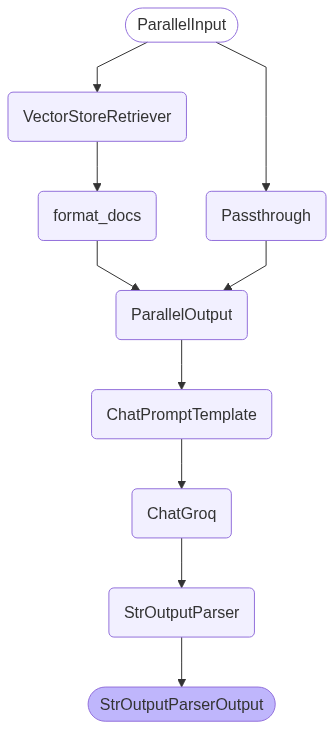

In [17]:
from IPython.display import display, Image
display(Image(rag_chain.get_graph().draw_mermaid_png()))

# ***Time to build Workstation***

In [18]:
from typing import Literal

In [19]:
class SelectPath(BaseModel):
    path: Annotated[Literal["LLM_CALL", "RAG_CALL", "INTERNET_SEARCH"], Field(description="Based on the user query select one path only. if user want to know about the Attention all you need paper or any query related to the Transformer then select the Rag call. if user want to know basics question the select llm call and finally user want to know about recent info then select the internet search.")]
    reason: Annotated[str, Field(description="Why you select a specific path give reason in one sentence.")]

In [20]:
from langchain_core.output_parsers import PydanticOutputParser

parser = PydanticOutputParser(pydantic_object=SelectPath)

In [21]:
path_prompt = PromptTemplate(
    template="""
    Think step by step on user query. The user query: {question}\n\n My vector store is related of Transformer paper as the paper name is *attention all you need* so if you think like user query is related to this paper then select the 'RAG_CALL'. Or user want to know about the latest news or any info the you select the 'INTERNET_SEARCH'. Finally if user want to know basics question such as wants know ML, DL, NLP, or any basics question if you think llm model can capable to give sold and correct answer then select the 'LLM_CALL'. you have to follow this format instruction.\n\n{format_instruction}.
    """,
    input_variables=["question"],
    partial_variables={
        "format_instruction": parser.get_format_instructions()
    }
)

In [22]:
path_prompt

PromptTemplate(input_variables=['question'], input_types={}, partial_variables={'format_instruction': 'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"path": {"description": "Based on the user query select one path only. if user want to know about the Attention all you need paper or any query related to the Transformer then select the Rag call. if user want to know basics question the select llm call and finally user want to know about recent info then select the internet search.", "enum": ["LLM_CALL", "RAG_CALL", "INTERNET_SEARCH"], "title": "Path", "type": "string"

In [23]:
test_chain = path_prompt | llm | parser

In [24]:
test_chain.invoke("What is positional embeddings?")

SelectPath(path='RAG_CALL', reason="The query about positional embeddings directly relates to a concept discussed in the Transformer paper, 'Attention Is All You Need'.")

In [25]:
test_chain.invoke("What is the weather today in Dhaka?")

SelectPath(path='INTERNET_SEARCH', reason='The user is asking for current weather information, which requires up-to-date data available through an internet search.')

In [26]:
response = test_chain.invoke("Why i need to learn Agentic AI?")
response.path, response.reason

('LLM_CALL',
 'The user query is a basic question about the necessity of learning Agentic AI, which can be adequately addressed by a large language model.')

## **Internet Search Pipeline Setup**

In [27]:
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

tavily_search = TavilySearch(
    max_results=3,
    topic="general"
)

tavily_search.invoke("Capital of bangladesh")

{'query': 'Capital of bangladesh',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Dhaka - Simple English Wikipedia, the free encyclopedia',
   'url': 'https://simple.wikipedia.org/wiki/Dhaka',
   'content': 'Dhaka is the capital and largest city of Bangladesh. Dhaka is Bangladesh’s most populous city and is one of the largest metropolises in South Asia. Dhaka College") was started in 1841, making it the oldest institution for higher education in the city. Many Muslim families send their children to attend part-time courses or even to pursue full-time religious education alongside other subjects, which is imparted in Bengali and Arabic in schools, colleges and madrasas.Dhaka College is the oldest institution for higher education in the city and among the earliest established in British India, founded in 1841. Since its establishment as the capital city, the population, area, and social and economic diversity of Dhaka have grown tremendously.',
   '

### *Create Agent State*

In [28]:
from typing import TypedDict, Sequence
from langchain_core.messages import BaseMessage
import operator

class State(TypedDict):
    """This is is my graph state where store all conversations."""
    messages: Annotated[Sequence[BaseMessage], operator.add]

## **Start to build the Graph Node**

In [29]:
## Supervisor node
def supervisor(state: State):
    """This node is responsible for to select the correct path based on the user query."""
    question = state['messages'][-1]
    print(question)
    chain = path_prompt | llm | parser
    response = chain.invoke(question)
    print(response.path, response.reason)
    
    return {
        "messages": [response.path]
    }

In [30]:
state={'messages': ["What is key and value vector?"]}
supervisor(state)

What is key and value vector?
RAG_CALL The user query is related to key and value vectors, which are concepts from the Transformer model discussed in the 'Attention Is All You Need' paper.


{'messages': ['RAG_CALL']}

In [31]:
def router(state: State):
    print("--Router--")
    last_message = state["messages"][-1]
    print(last_message)
    
    if last_message == "RAG_CALL":
        return "RAG_CALL"
    elif last_message == "LLM_CALL":
        return "LLM_CALL"
    else:
        return "INTERNET_SEARCH"

In [32]:
from langchain_core.output_parsers import StrOutputParser

In [33]:
def llm_call(state: State):
    print("--LLM Call--")
    question = state['messages'][0]
    prompt = PromptTemplate(
        template="""
        You are a helpful ai assistant. Answer the question based on you capability. if you think you do not know about the question do not give the answer just simply say i do not know the proper answer. Though do not give any hypothetical answer or hallucination response or do not predict the answer. If you are confident enough then provide the answer properly.\n
        the user query is: {question}
        """,
        input_variables=["question"]
    )
    chain = prompt | llm | StrOutputParser()
    response = chain.invoke(
        {
            "question": question
        }
    )
    print(response)
    return {
        "messages": [response]
    }
    

In [34]:
def internet_search(state: State):
    print("--Internet Search--")
    question = state['messages'][0]
    web_search_content = tavily_search.invoke(question)
    prompt = PromptTemplate(
        template="""
        You are a helpful ai assistant who can give answer of the user query based on the web search content. First read the user query and check the web_search_content. If you think web content is not enough for to give the answer of the user query then simply say. No have enough context to give the answer. And below the user query and web_search_content.\n\n
        the user query is: {question}\n\n
        the web_search_content: {web_search_content}\n
        """,
        input_variables=["question", "web_search_content"]
    )
    chain = prompt | llm | StrOutputParser()
    response = chain.invoke(
        {
            "question": question,
            "web_search_content": web_search_content
        }
    )
    return {
        "messages": [response]
    }

In [54]:
from langchain import hub

In [48]:
prompt = hub.pull("rlm/rag-prompt")
prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

In [58]:
def rag_call(state: State):
    print("--Rag call--")
    question = state['messages'][0]
    print(question)
    prompt = hub.pull("rlm/rag-prompt")
    
    print("im hare-1")
    rag_chain = (
        {
            "context": retriever | format_docs,
            "question": RunnablePassthrough()
        }
        | prompt
        | llm
        | StrOutputParser()
    )
    print("im hare-2")
    response = rag_chain.invoke(question)
    print("rag-response", response)
    
    return {
        "messages": [response]
    }
    

## **Validation Node**

In [36]:
class validationOutput(BaseModel):
    validation_response: Annotated[Literal["yes", "no"], Field(description="analysis the user question and the output. If you think the output is correct based on the question then say 'yes' otherwise say 'no' if the answer is not correct based on the user question.")]

In [37]:
validate_parser = PydanticOutputParser(pydantic_object=validationOutput)

In [67]:
def validation_node(state: State):
    print("---validation---")
    question = state['messages'][0]
    answer = state['messages'][-1]
    
    print(question, answer)
    validation_prompt = PromptTemplate(
        template="""Think you are evaluator, your task is validate the output of the user question. Example if the answer is correct based on the user question then simple say 'yes', otherwise say 'no' is the answer is not relevant to the question. Think very carefully to validation time. Below the user question and the answer of the question.
        the user question is : {question}\n\n and the output answer of the question is: {answer}.\n\n Most important is must be follow the output format instruction: {format_instruction}""",
        input_variables=["question", "answer"],
        partial_variables={
            "format_instruction": validate_parser.get_format_instructions()
        }
    )
    
    validation_chain = validation_prompt | llm | validate_parser
    
    result = validation_chain.invoke(
        {
            "question": question,
            "answer": answer
        }
    )
    print("im hare 3")
    print(result.validation_response)
    return {
        "messages": [result.validation_response]
    }

In [41]:
class RewriteUserQuestion(BaseModel):
    rewrite_question: Annotated[str, Field(description="Rewrite the user query for better output generation. question should be in one sentence.")]

In [42]:
rewrite_parser = PydanticOutputParser(pydantic_object=RewriteUserQuestion)

In [43]:
def rewrite_query(state: State):
    question = state['messages'][0]
    
    rewrite_prompt = PromptTemplate(
        """You are a helpful ai assistant and your task is rewrite the user input query for better response generation. Example like if user query is bad then occurred problem such as data extraction from vector store or internet search. So rewrite the query for best output generation.\n
        This is user question: {question}. and must be follow the format instruction to produce the output. The format instruction is: {format_instruction}""",
        input_variables=["question"],
        partial_variables={
            "format_instruction": rewrite_parser.get_format_instructions()
        }
    )
    
    rewrite_chain = rewrite_prompt | llm | rewrite_parser
    new_question = rewrite_chain.invoke(
        {
            "question": question
        }
    )
    state["messages"][0] = new_question.rewrite_question
    print(state["messages"][0])
    
    

In [44]:
from langgraph.graph import END

def validation_router(state: State):
    validation_result = state['messages'][-1]
    
    if validation_result == "yes":
        return "PASS"
    else:
        return "FAILED"

## Build the Graph

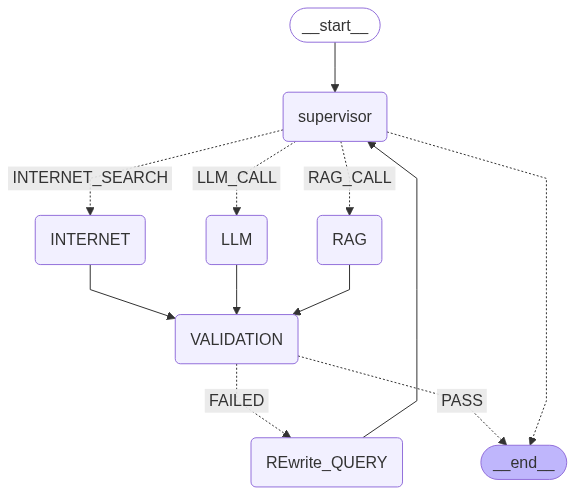

In [73]:
from langgraph.graph import START, StateGraph
from IPython.display import display, Image

workflow = StateGraph(State)

## Node
workflow.add_node("supervisor", supervisor)
workflow.add_node("LLM", llm_call)
workflow.add_node("RAG", rag_call)
workflow.add_node("INTERNET", internet_search)
workflow.add_node("VALIDATION", validation_node)
workflow.add_node("REwrite_QUERY", rewrite_query)

## Edges
workflow.add_edge(START, "supervisor")
workflow.add_conditional_edges(
    "supervisor",
    router,
    {
        "INTERNET_SEARCH": "INTERNET",
        "LLM_CALL": "LLM",
        "RAG_CALL": "RAG"
    }
)
workflow.add_edge("LLM", "VALIDATION")
workflow.add_edge("RAG", "VALIDATION")
workflow.add_edge("INTERNET", "VALIDATION")
workflow.add_conditional_edges(
    "VALIDATION",
    validation_router,
    {
        "PASS": END,
        "FAILED": "REwrite_QUERY"
    }
)
workflow.add_edge("REwrite_QUERY", "supervisor")

graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

# ***Output Testing***

In [74]:
graph.invoke(
    {
        "messages": ["What is key, query, and value vector?"]
    }
)

What is key, query, and value vector?
RAG_CALL The user query directly relates to concepts within the Transformer model discussed in the 'Attention Is All You Need' paper.
--Router--
RAG_CALL
--Rag call--
What is key, query, and value vector?
im hare-1
im hare-2
rag-response The query, key, and value vectors are vectors used in an attention function. Specifically, the query vector is used to compute weights on the value vectors based on their similarity to the key vectors. The key, query, and value vectors have dimensions dk, dk, and dv respectively.
---validation---
What is key, query, and value vector? The query, key, and value vectors are vectors used in an attention function. Specifically, the query vector is used to compute weights on the value vectors based on their similarity to the key vectors. The key, query, and value vectors have dimensions dk, dk, and dv respectively.
im hare 3
yes


{'messages': ['What is key, query, and value vector?',
  'RAG_CALL',
  'The query, key, and value vectors are vectors used in an attention function. Specifically, the query vector is used to compute weights on the value vectors based on their similarity to the key vectors. The key, query, and value vectors have dimensions dk, dk, and dv respectively.',
  'yes']}

In [71]:
graph.invoke(
    {
        "messages": ["What is the current weather of Dhaka?"]
    }
)

What is the current weather of Dhaka?
INTERNET_SEARCH The user query is about obtaining current weather information, which requires recent data available on the internet.
--Router--
INTERNET_SEARCH
--Internet Search--
---validation---
What is the current weather of Dhaka? The current weather in Dhaka is:

* Temperature: 32.9°C (91.2°F)
* Condition: Patchy rain nearby
* Wind: 8.7 mph (14.0 kph) from the South (S)
* Humidity: 60%
* Cloud cover: 60%
* Visibility: 10.0 km (6.0 miles)

According to the weatherapi.com, the current weather in Dhaka is patchy rain nearby with a temperature of 32.9°C (91.2°F). 

You can also check other weather websites like People's Weather or World-Weather.info for more updates.

Is there anything else I can help you with?
im hare 3
yes


{'messages': ['What is the current weather of Dhaka?',
  'INTERNET_SEARCH',
  "The current weather in Dhaka is:\n\n* Temperature: 32.9°C (91.2°F)\n* Condition: Patchy rain nearby\n* Wind: 8.7 mph (14.0 kph) from the South (S)\n* Humidity: 60%\n* Cloud cover: 60%\n* Visibility: 10.0 km (6.0 miles)\n\nAccording to the weatherapi.com, the current weather in Dhaka is patchy rain nearby with a temperature of 32.9°C (91.2°F). \n\nYou can also check other weather websites like People's Weather or World-Weather.info for more updates.\n\nIs there anything else I can help you with?",
  'yes']}

In [72]:
graph.invoke(
    {
        "messages": ["What i should learn Agentic AI?"]
    }
)

What i should learn Agentic AI?
LLM_CALL The user query is about learning Agentic AI, a topic within AI that likely requires a foundational understanding of AI, ML, or DL, which an LLM can provide guidance on.
--Router--
LLM_CALL
--LLM Call--
To learn about Agentic AI, here are some key areas and concepts you might want to explore:

1. **Foundations of AI**: Before diving into Agentic AI, ensure you have a solid understanding of basic AI concepts, including machine learning, deep learning, and their applications.

2. **Autonomy and Agency in AI**: Understand what it means for an AI system to be "agentic." This involves learning about autonomy, decision-making, and how AI systems can act independently to achieve goals.

3. **Multi-Agent Systems (MAS)**: Agentic AI often involves systems where multiple AI agents interact. Learning about MAS can provide insights into how these agents can work together, negotiate, or compete.

4. **Cognitive Architectures**: These are software frameworks t

{'messages': ['What i should learn Agentic AI?',
  'LLM_CALL',
  'To learn about Agentic AI, here are some key areas and concepts you might want to explore:\n\n1. **Foundations of AI**: Before diving into Agentic AI, ensure you have a solid understanding of basic AI concepts, including machine learning, deep learning, and their applications.\n\n2. **Autonomy and Agency in AI**: Understand what it means for an AI system to be "agentic." This involves learning about autonomy, decision-making, and how AI systems can act independently to achieve goals.\n\n3. **Multi-Agent Systems (MAS)**: Agentic AI often involves systems where multiple AI agents interact. Learning about MAS can provide insights into how these agents can work together, negotiate, or compete.\n\n4. **Cognitive Architectures**: These are software frameworks that provide the structure for modeling the mind and simulating human cognition and reasoning. They\'re crucial for creating agentic behaviors in AI.\n\n5. **Reinforcemen